<a href="https://colab.research.google.com/github/jovanakalamkovic99/Test-3-BGI/blob/main/BGI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.cluster.hierarchy as shc

In [2]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [3]:
import scanpy as sc

In [4]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follow

In [5]:
import pandas as pd

data_original = pd.read_csv("E14.5_E1S3_Dorsal_Midbrain_GEM_CellBin_merge.tsv", delimiter='\t')


In [6]:
print(data_original)

                geneID      x     y  MIDCounts    cell
0               Arpc1b  19881  9379          3  170675
1        B230118H07Rik  19881  9379          2  170675
2              Bcl2l12  19881  9379          1  170675
3                Ccnd3  19881  9379          1  170675
4                 Cdk8  19881  9379          3  170675
...                ...    ...   ...        ...     ...
1656402            Zyx  22668  6560          1  181843
1656403         mt-Nd2  22668  6560          1  181843
1656404           Fzd2  22695  6346          1  181844
1656405        Gm26917  22695  6346          4  181844
1656406         Ndufb7  22695  6346          3  181844

[1656407 rows x 5 columns]


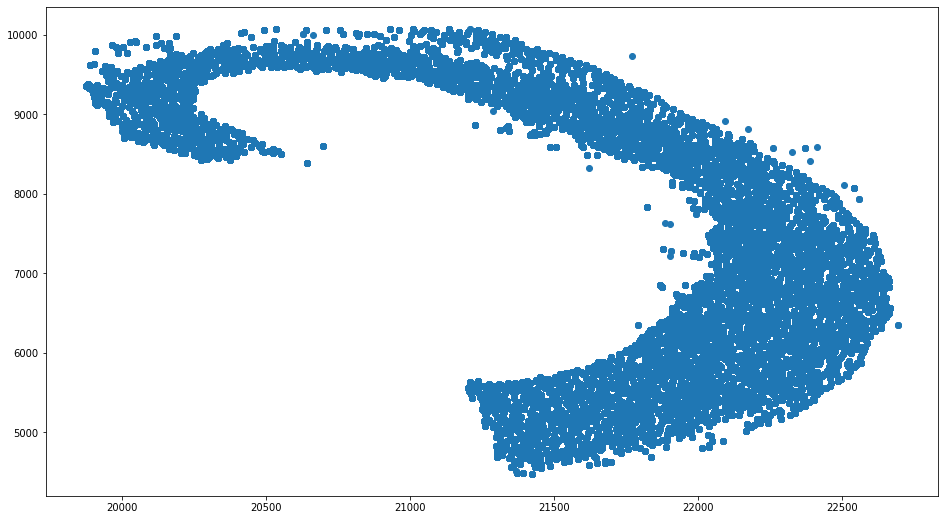

In [7]:
plt.figure(figsize=(16,9))

plt.scatter(data_original.x, data_original.y)

In [8]:
print(data_original.geneID.unique())
print(data_original.geneID.unique().size)

['Arpc1b' 'B230118H07Rik' 'Bcl2l12' ... 'Tuba8' 'Ddx60' 'Far2os1']
18698


In [9]:
print(data_original.cell.unique())
print(data_original.cell.unique().size)

[170675 170785 170808 ... 181842 181843 181844]
4872


In [10]:
import anndata as ad

data = pd.read_table("E14.5_E1S3_Dorsal_Midbrain_GEM_CellBin_merge.tsv", delimiter='\t', header=0)

In [11]:
print(data)

                geneID      x     y  MIDCounts    cell
0               Arpc1b  19881  9379          3  170675
1        B230118H07Rik  19881  9379          2  170675
2              Bcl2l12  19881  9379          1  170675
3                Ccnd3  19881  9379          1  170675
4                 Cdk8  19881  9379          3  170675
...                ...    ...   ...        ...     ...
1656402            Zyx  22668  6560          1  181843
1656403         mt-Nd2  22668  6560          1  181843
1656404           Fzd2  22695  6346          1  181844
1656405        Gm26917  22695  6346          4  181844
1656406         Ndufb7  22695  6346          3  181844

[1656407 rows x 5 columns]


In [12]:
#data1 = data.drop('x', axis=1)
#data1 = data1.drop('y', axis=1)

# Reshaping dataframe to have 'cell' as index, 'geneID' as columns and 'MIDCounts' as values
data = data.pivot(index='cell', columns='geneID', values='MIDCounts')
data.fillna(0, inplace=True)


In [13]:
print(data)

geneID  0610005C13Rik  0610009B22Rik  0610009O20Rik  0610010F05Rik  \
cell                                                                 
170675            0.0            0.0            0.0            0.0   
170785            0.0            0.0            0.0            0.0   
170808            0.0            0.0            0.0            0.0   
170818            0.0            0.0            0.0            0.0   
170819            0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
181840            0.0            0.0            0.0            0.0   
181841            0.0            0.0            0.0            0.0   
181842            0.0            0.0            0.0            0.0   
181843            0.0            0.0            0.0            0.0   
181844            0.0            0.0            0.0            0.0   

geneID  0610010K14Rik  0610012G03Rik  0610025J13Rik  0610030E20Rik  \
cell               

In [14]:
# Creating an AnnData object
adata = ad.AnnData(data)

<ipython-input-14-3cb3e046d7ef>:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(data)
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
print(adata)

AnnData object with n_obs × n_vars = 4872 × 18698


In [16]:
print(adata.to_df())

geneID  0610005C13Rik  0610009B22Rik  0610009O20Rik  0610010F05Rik  \
cell                                                                 
170675            0.0            0.0            0.0            0.0   
170785            0.0            0.0            0.0            0.0   
170808            0.0            0.0            0.0            0.0   
170818            0.0            0.0            0.0            0.0   
170819            0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
181840            0.0            0.0            0.0            0.0   
181841            0.0            0.0            0.0            0.0   
181842            0.0            0.0            0.0            0.0   
181843            0.0            0.0            0.0            0.0   
181844            0.0            0.0            0.0            0.0   

geneID  0610010K14Rik  0610012G03Rik  0610025J13Rik  0610030E20Rik  \
cell               

In [17]:
sc.pp.normalize_total(adata)



In [18]:
sc.pp.pca(adata)


In [19]:
print(adata)

AnnData object with n_obs × n_vars = 4872 × 18698
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [20]:
import numpy as np

# Calculate cell centers in order to get the right shape to add to the anndata
cell_centers = data_original.groupby('cell')[['x', 'y']].mean()

adata.obs['cell_center_x'] = cell_centers['x'].values
adata.obs['cell_center_y'] = cell_centers['y'].values

In [21]:
print(adata)

AnnData object with n_obs × n_vars = 4872 × 18698
    obs: 'cell_center_x', 'cell_center_y'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [22]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3773931 sha256=d27c844017abbcd29873d0be4f85d0829a836bc463d33adb8f0267927f4b4323
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


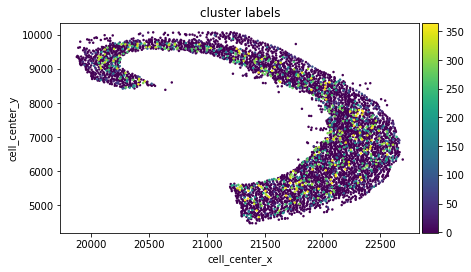

In [23]:
import hdbscan
from hdbscan import HDBSCAN
import numpy as np

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric='euclidean', cluster_selection_method='leaf', prediction_data=True, algorithm='best')

clusterer.fit(adata.obsm['X_pca'], adata.obs[['cell_center_x','cell_center_y']])

adata.obs['cluster_labels'] = clusterer.labels_

sc.pl.scatter(adata, x='cell_center_x', y='cell_center_y', color='cluster_labels', show=True)

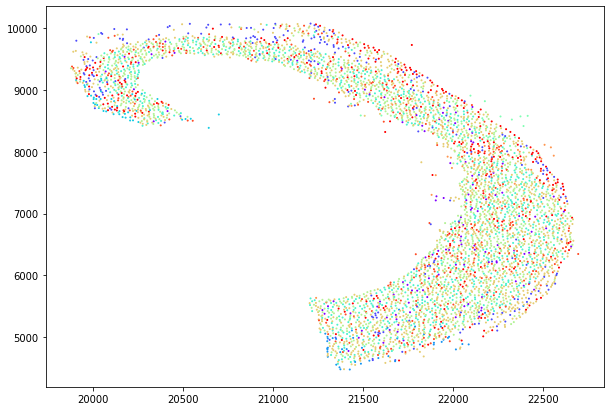

In [24]:
from sklearn.mixture import GaussianMixture
import numpy as np

X = np.hstack([adata.obsm['X_pca'], adata.obs[['cell_center_x', 'cell_center_y']]])

gmm = GaussianMixture(n_components=11)

gmm.fit(X)

cluster_labels = gmm.predict(X)

adata.obs['cluster_label'] = cluster_labels

# plot the results
#!pip uninstall matplotlib
#!pip install matplotlib==3.1.3

#plt.scatter(adata.obs['x'], adata.obs['y'], c=adata.obs['cluster_label'])
#plt.show()
plt.figure(figsize=(10, 7))
plt.scatter(adata.obs['cell_center_x'], adata.obs['cell_center_y'], c=adata.obs['cluster_label'],cmap='rainbow',s=1)
plt.show()

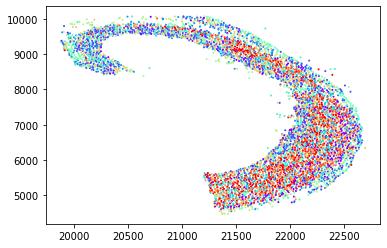

In [25]:
from sklearn.cluster import KMeans

# Performing UMAP dimensionality reduction on the data
sc.pp.neighbors(adata)
sc.tl.umap(adata)

kmeans = KMeans(n_clusters=11)
kmeans.fit(adata.obsm['X_umap'])

adata.obs['cluster'] = kmeans.labels_

plt.scatter(adata.obs['cell_center_x'], adata.obs['cell_center_y'], c=adata.obs['cluster'],cmap='rainbow',s=1)
plt.show()

In [26]:
print(adata.obs['cluster'])

cell
170675    0
170785    4
170808    7
170818    4
170819    7
         ..
181840    4
181841    1
181842    4
181843    2
181844    7
Name: cluster, Length: 4872, dtype: int32


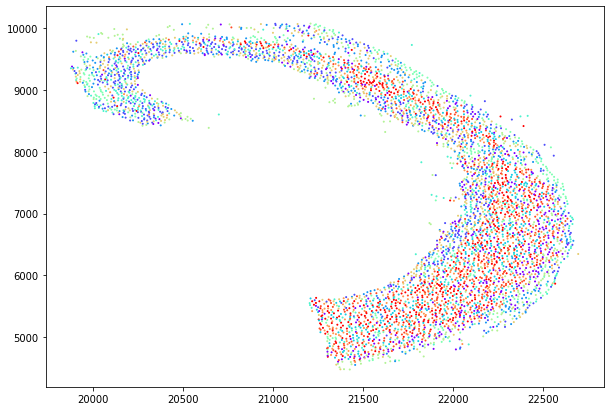

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(adata.obs['cell_center_x'], adata.obs['cell_center_y'], c=adata.obs['cluster'],cmap='rainbow',s=1)
plt.show()

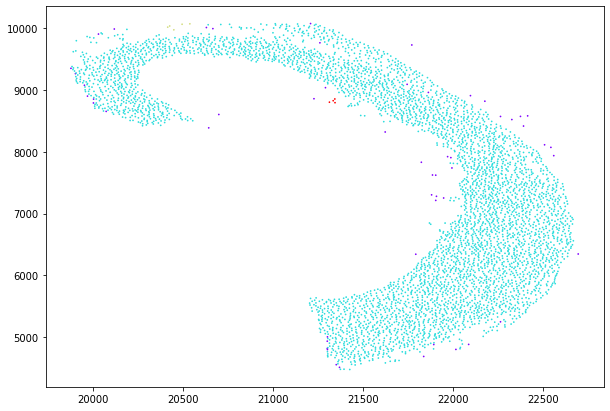

In [28]:
from sklearn.cluster import DBSCAN

X = np.column_stack((adata.obs['cell_center_x'], adata.obs['cell_center_y'], adata.obsm['X_pca']))

dbscan = DBSCAN(eps=100, min_samples=2)
dbscan.fit(X)

labels_dbscan = dbscan.labels_

plt.figure(figsize=(10, 7))
plt.scatter(adata.obs['cell_center_x'], adata.obs['cell_center_y'], c=labels_dbscan, cmap='rainbow',s=0.5)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import numpy as np

coordinates = np.column_stack((adata.obs['cell_center_x'], adata.obs['cell_center_y']))
data = np.column_stack((adata.obsm['X_pca'], coordinates))

agg_clustering = AgglomerativeClustering(n_clusters=11)
agg_clustering.fit(data)

cluster_label_agg = agg_clustering.labels_


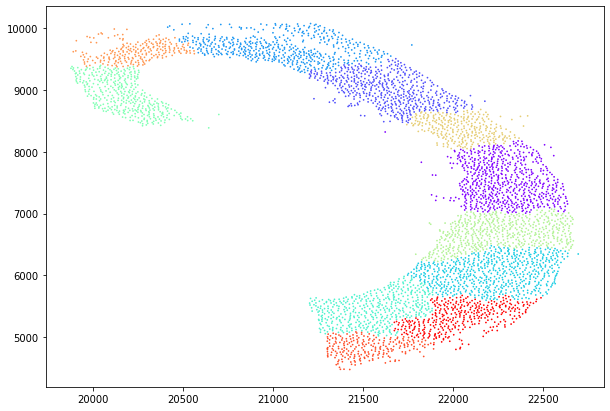

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(adata.obs['cell_center_x'], adata.obs['cell_center_y'], c=cluster_label_agg, cmap='rainbow',s=0.5)
plt.show()

In [31]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.1 MB/s eta 0:00:00


In [32]:
!pip install louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00


In [33]:
import louvain

sc.tl.louvain(adata)

<ipython-input-33-607a00cb8fc5>:1: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [34]:
unique_clusters = adata.obs['louvain'].nunique()
print(unique_clusters)

9


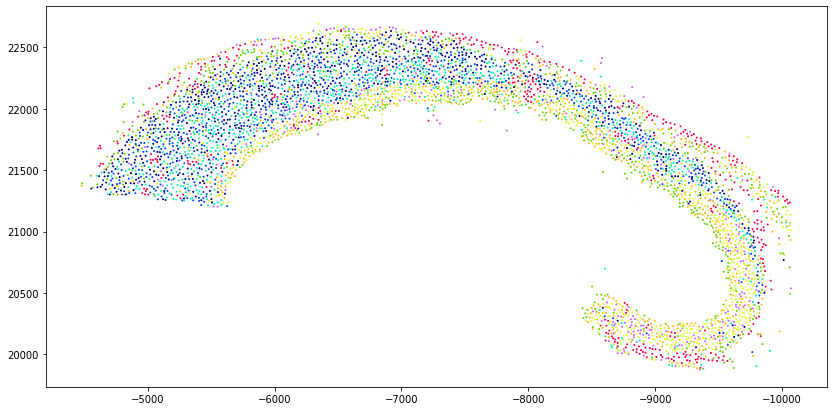

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = adata.obs['cell_center_x']
y = adata.obs['cell_center_y']

theta = np.pi/2 

# rotation matrix
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

x_rotated, y_rotated = np.dot(rotation_matrix, [x, y])

plt.figure(figsize=(14, 7))
plt.scatter(x_rotated, y_rotated, c=adata.obs['louvain'].cat.codes, cmap='gist_ncar', s=1)
plt.xlim(plt.xlim()[::-1])
plt.show()


In [36]:
import louvain

sc.tl.louvain(adata, use_weights=True)

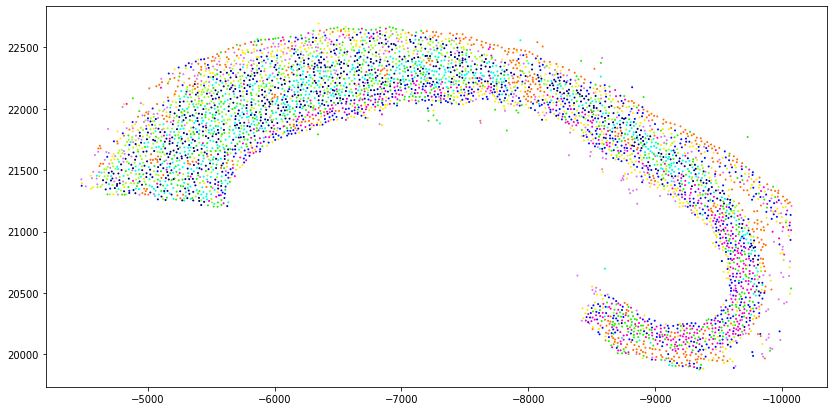

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = adata.obs['cell_center_x']
y = adata.obs['cell_center_y']

theta = np.pi/2 

rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

x_rotated, y_rotated = np.dot(rotation_matrix, [x, y])

plt.figure(figsize=(14, 7))
plt.scatter(x_rotated, y_rotated, c=adata.obs['louvain'].cat.codes, cmap='gist_ncar', s=1)
plt.xlim(plt.xlim()[::-1])
plt.show()

In [38]:
unique_clusters = adata.obs['louvain'].nunique()
print(unique_clusters)

10


In [39]:
sc.tl.louvain(adata, resolution = 2, use_weights = True)

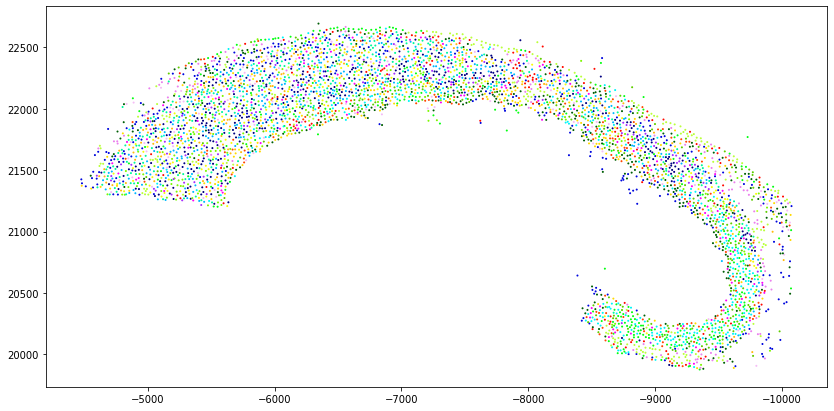

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = adata.obs['cell_center_x']
y = adata.obs['cell_center_y']

theta = np.pi/2 

rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

x_rotated, y_rotated = np.dot(rotation_matrix, [x, y])

plt.figure(figsize=(14, 7))
plt.scatter(x_rotated, y_rotated, c=adata.obs['louvain'].cat.codes, cmap='gist_ncar', s=1)
plt.xlim(plt.xlim()[::-1])
plt.show()

In [41]:
unique_clusters = adata.obs['louvain'].nunique()
print(unique_clusters)

20
